Aim: Explore various libraries of python for image processing and computer vision

PILLOW

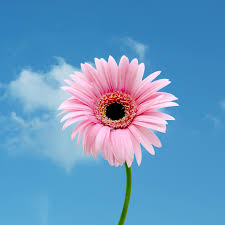

In [25]:
from PIL import Image

image_path = "image1.jfif"
image = Image.open(image_path)
image

In [26]:
print("Original Image Size:", image.size)

Original Image Size: (225, 225)


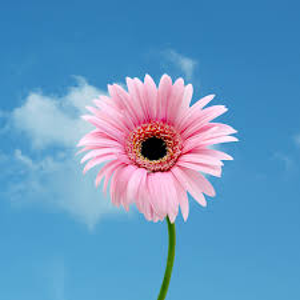

In [27]:
resized_image = image.resize((300, 300))
resized_image

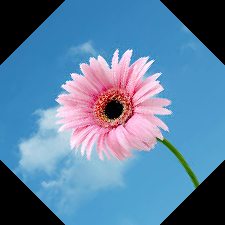

In [28]:
rotated_image = image.rotate(45)
rotated_image

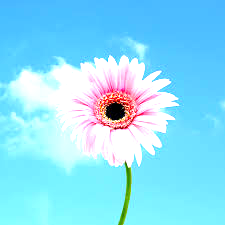

In [29]:
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
enhancer = ImageEnhance.Brightness(image)
bright_image = enhancer.enhance(1.5)
bright_image

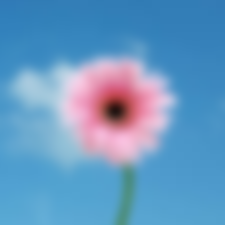

In [30]:
blurred_image = image.filter(ImageFilter.GaussianBlur(5))
blurred_image

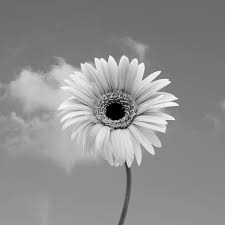

In [31]:
grayscale_image = image.convert("L")
grayscale_image

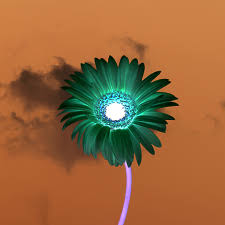

In [32]:
negative_image = ImageOps.invert(image.convert("RGB"))
negative_image

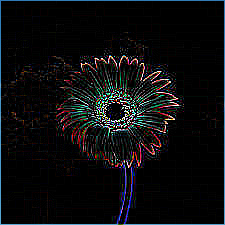

In [33]:
edge_detected_image = image.filter(ImageFilter.FIND_EDGES)
edge_detected_image

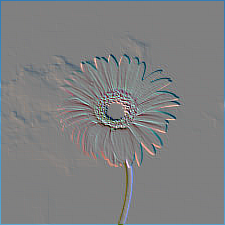

In [34]:
embossed_image = image.filter(ImageFilter.EMBOSS)
embossed_image

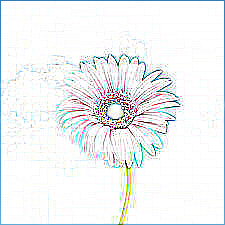

In [35]:
contour_image = image.filter(ImageFilter.CONTOUR)
contour_image


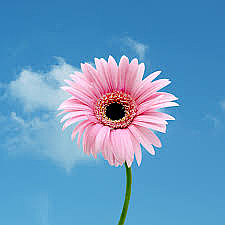

In [36]:
sharpened_image = image.filter(ImageFilter.SHARPEN)
sharpened_image


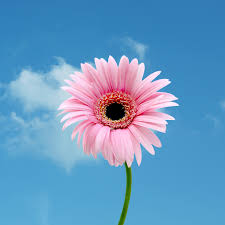

In [37]:
autocontrast_image = ImageOps.autocontrast(image)
autocontrast_image


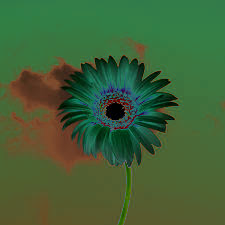

In [38]:
solarized_image = ImageOps.solarize(image, threshold=128)
solarized_image


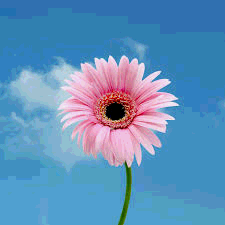

In [39]:
posterized_image = ImageOps.posterize(image, bits=4)
posterized_image


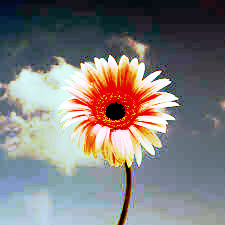

In [40]:
equalized_image = ImageOps.equalize(image)
equalized_image


In [41]:
print("Mode:", image.mode)
print("Format:", image.format)
print("Size:", image.size)
print("Histogram:", image.histogram()[:10])


Mode: RGB
Format: JPEG
Size: (225, 225)
Histogram: [75, 72, 5, 8, 9, 8, 11, 6, 4, 6]


IMAGEIO

In [42]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, color, filters, exposure, transform

def show_image(img, title):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap="gray" if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

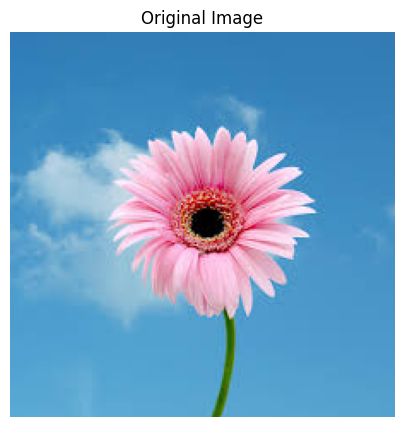

In [43]:
image_path = "image1.jfif"
image = iio.imread(image_path)
show_image(image, "Original Image")

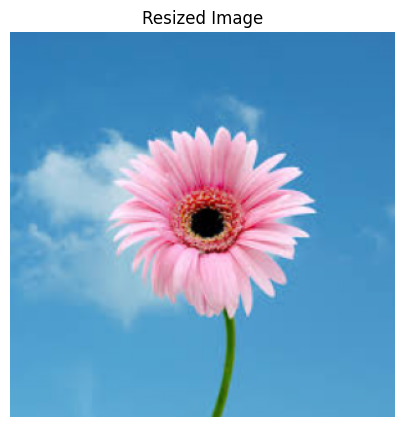

In [44]:
resized_image = transform.resize(image, (300, 300), anti_aliasing=True)
show_image(resized_image, "Resized Image")

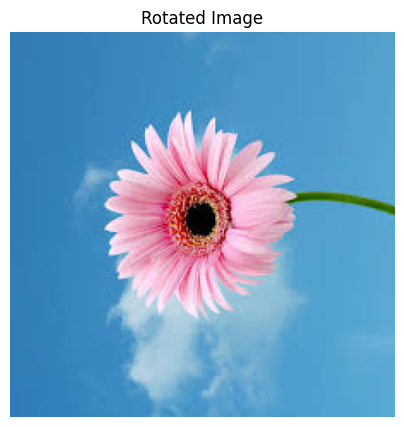

In [45]:
rotated_image = np.rot90(image)
show_image(rotated_image, "Rotated Image")

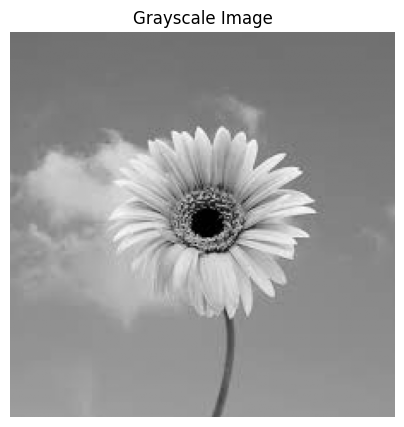

In [46]:
grayscale_image = color.rgb2gray(image)
show_image(grayscale_image, "Grayscale Image")

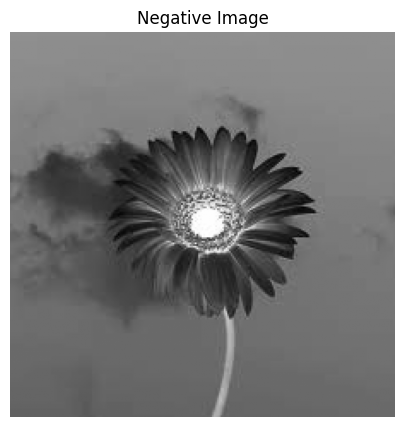

In [47]:
negative_image = img_as_ubyte(1 - grayscale_image)
show_image(negative_image, "Negative Image")

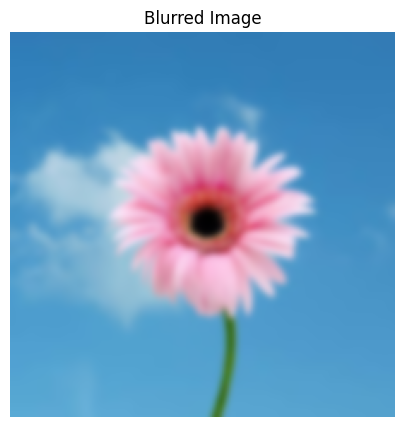

In [48]:
blurred_image = filters.gaussian(image, sigma=2, channel_axis=-1)
show_image(blurred_image, "Blurred Image")


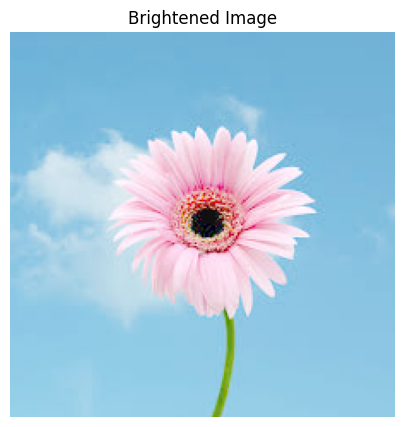

In [49]:
bright_image = exposure.adjust_gamma(image, gamma=0.5)
show_image(bright_image, "Brightened Image")

SCKIT-IMAGE

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure, transform, util

def show_image(img, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap="gray" if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

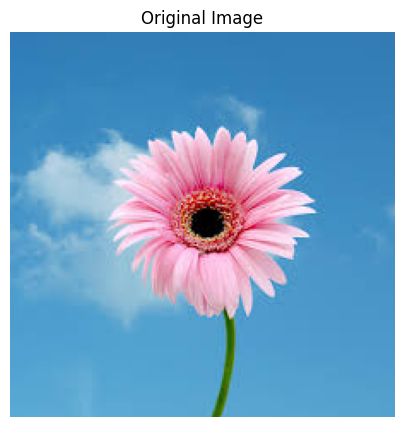

In [52]:
image_path = "image1.jfif"
image = io.imread(image_path)
show_image(image, "Original Image")

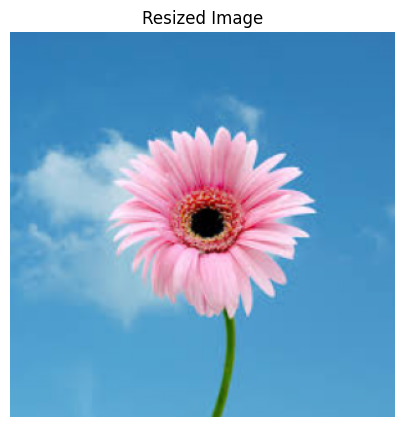

In [53]:
resized_image = transform.resize(image, (300, 300), anti_aliasing=True)
show_image(resized_image, "Resized Image")

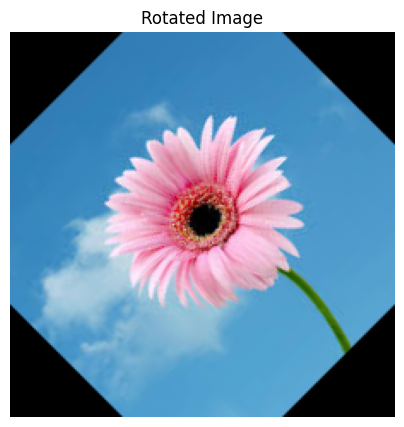

In [54]:
rotated_image = transform.rotate(image, angle=45)
show_image(rotated_image, "Rotated Image")


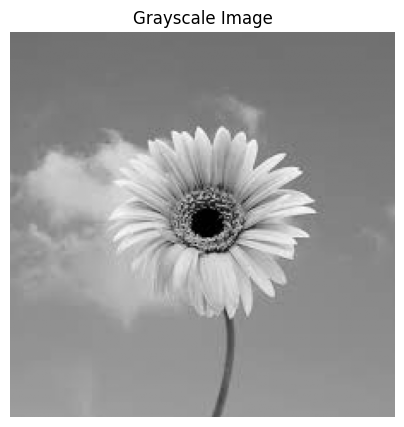

In [55]:
grayscale_image = color.rgb2gray(image)
show_image(grayscale_image, "Grayscale Image")

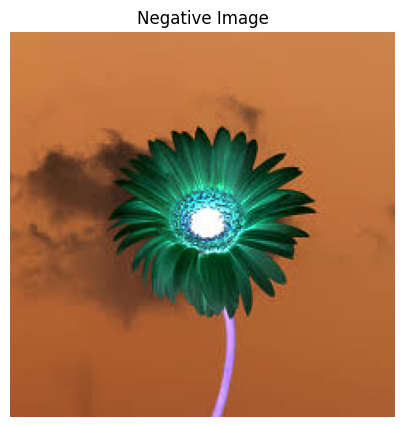

In [56]:
negative_image = util.invert(image)
show_image(negative_image, "Negative Image")

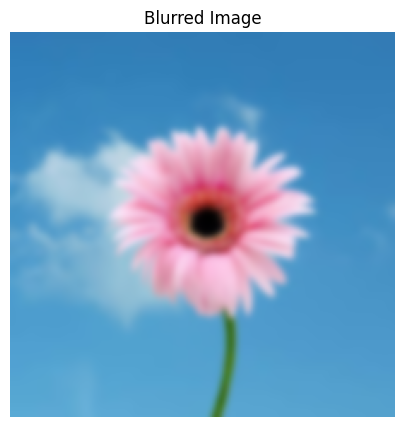

In [57]:
blurred_image = filters.gaussian(image, sigma=2, channel_axis=-1)
show_image(blurred_image, "Blurred Image")

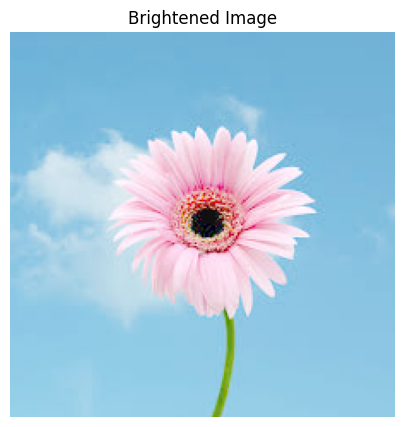

In [58]:
bright_image = exposure.adjust_gamma(image, gamma=0.5)
show_image(bright_image, "Brightened Image")

OPEN-CV

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title, cmap=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

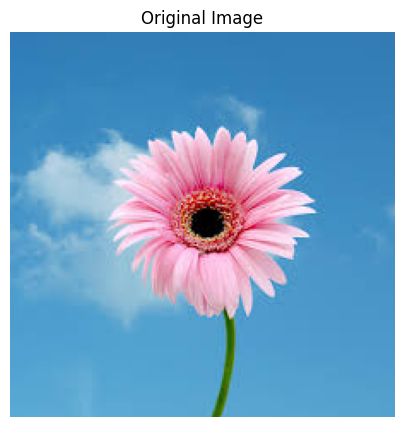

In [60]:
image_path = "image1.jfif"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image, "Original Image")

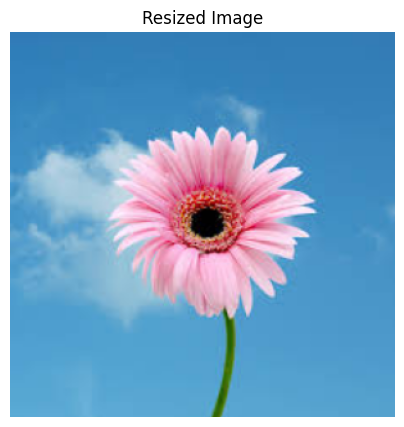

In [61]:
resized_image = cv2.resize(image, (300, 300))
show_image(resized_image, "Resized Image")

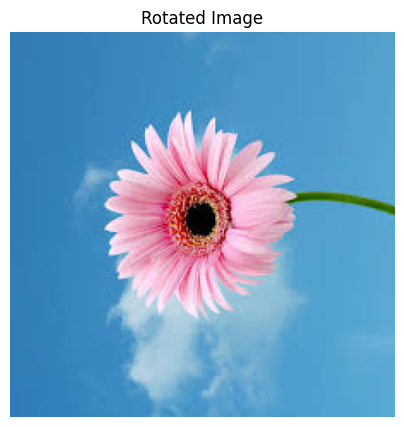

In [62]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
show_image(rotated_image, "Rotated Image")

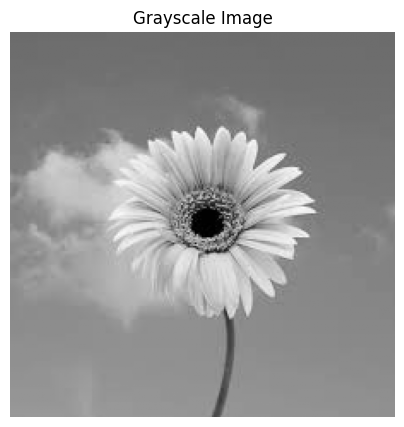

In [63]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
show_image(grayscale_image, "Grayscale Image", cmap="gray")

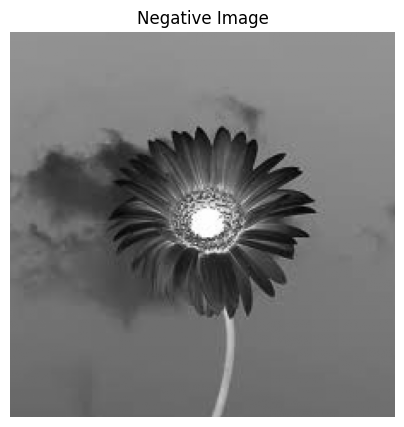

In [64]:
negative_image = cv2.bitwise_not(grayscale_image)
show_image(negative_image, "Negative Image", cmap="gray")

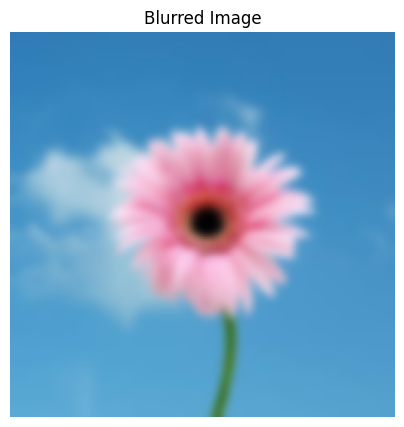

In [65]:
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
show_image(blurred_image, "Blurred Image")

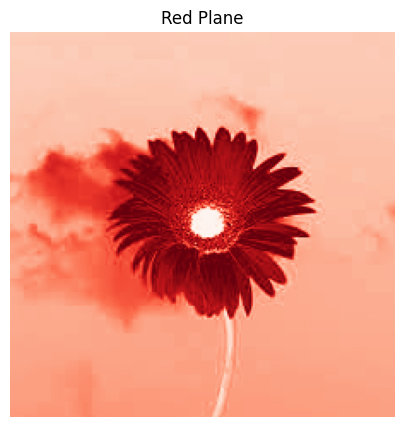

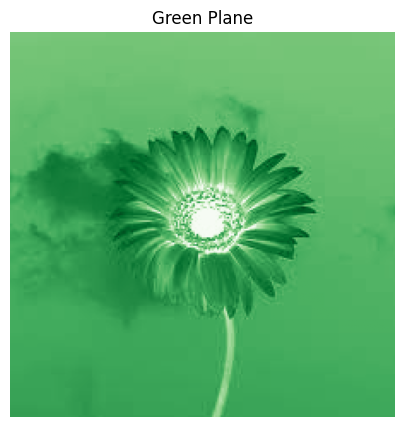

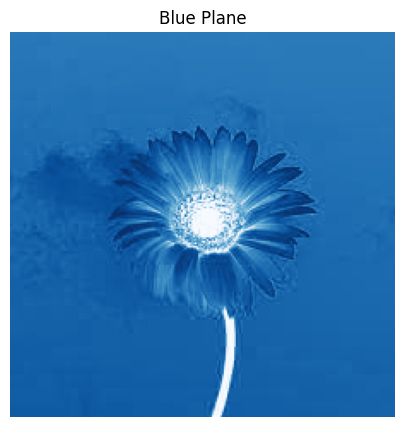

In [67]:
R, G, B = cv2.split(image)
show_image(R, "Red Plane", cmap="Reds")
show_image(G, "Green Plane", cmap="Greens")
show_image(B, "Blue Plane", cmap="Blues")